In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>Dengue Data Analysis</h1>
<h3>Analyst: Ian Genesis D. Minorca</h3>

In [2]:
deng = pd.read_csv('dengue.csv')
deng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
deng["Month"] = pd.Categorical(deng["Month"], categories=month_order, ordered=True)

<h1 style="color:yellow;">Insight 1</h1>
<h3>Dengue Status</h3>

In [4]:
summary_stats = deng.describe()
summary_stats

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


<h1 style="color:yellow;">Insight 2</h1>
<h3>Deaths from Dengue</h3>

Text(0, 0.5, '')

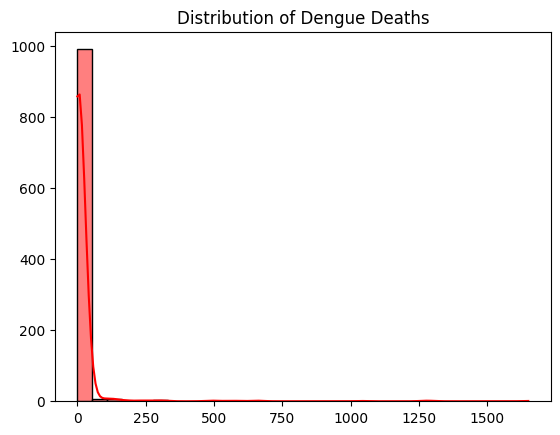

In [5]:
sns.histplot(deng["Dengue_Deaths"], bins=30, kde=True, color="red").set_title("Distribution of Dengue Deaths")
plt.xlabel("")
plt.ylabel("")

<h1 style="color:yellow;">Insight 3</h1>
<h3>Dengue Deaths in Years</h3>

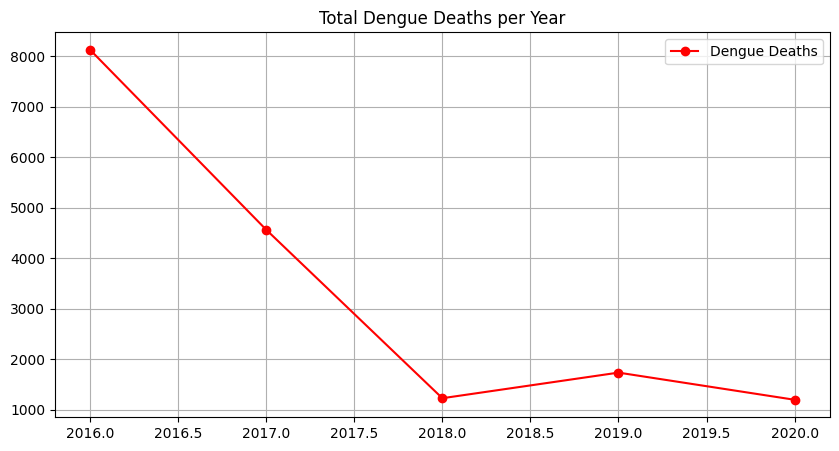

In [6]:
vis3 = deng.groupby(['Year'])['Dengue_Deaths'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(vis3['Year'], vis3['Dengue_Deaths'], marker='o', color='red', zorder=3)
plt.grid(True, zorder=0)
plt.title('Total Dengue Deaths per Year')
plt.legend(['Dengue Deaths'])
plt.show()

<h1 style="color:yellow;">Insight 4</h1>
<h3>Dengue Yearly Comparision</h3>

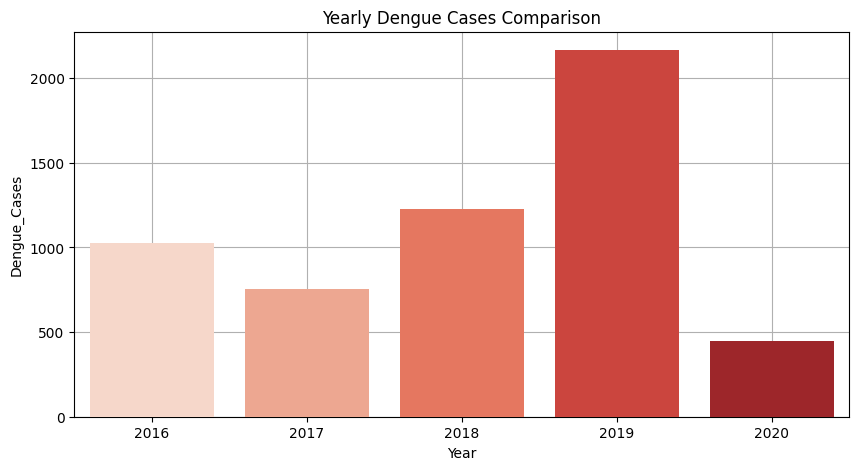

In [7]:
# vis4 = deng.groupby(['Dengue_Deaths', 'Dengue_Cases']).corr().iloc[0, 1]
# sns.heatmap(vis4, annot=True, cmap="coolwarm").set_title("Correlation Between Dengue Cases and Deaths")
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Dengue_Cases', data=deng, palette='Reds', zorder=3, ci=None)
plt.title('Yearly Dengue Cases Comparison')
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 5</h1>
<h3>Monthly Variation in Dengue Deaths</h3>

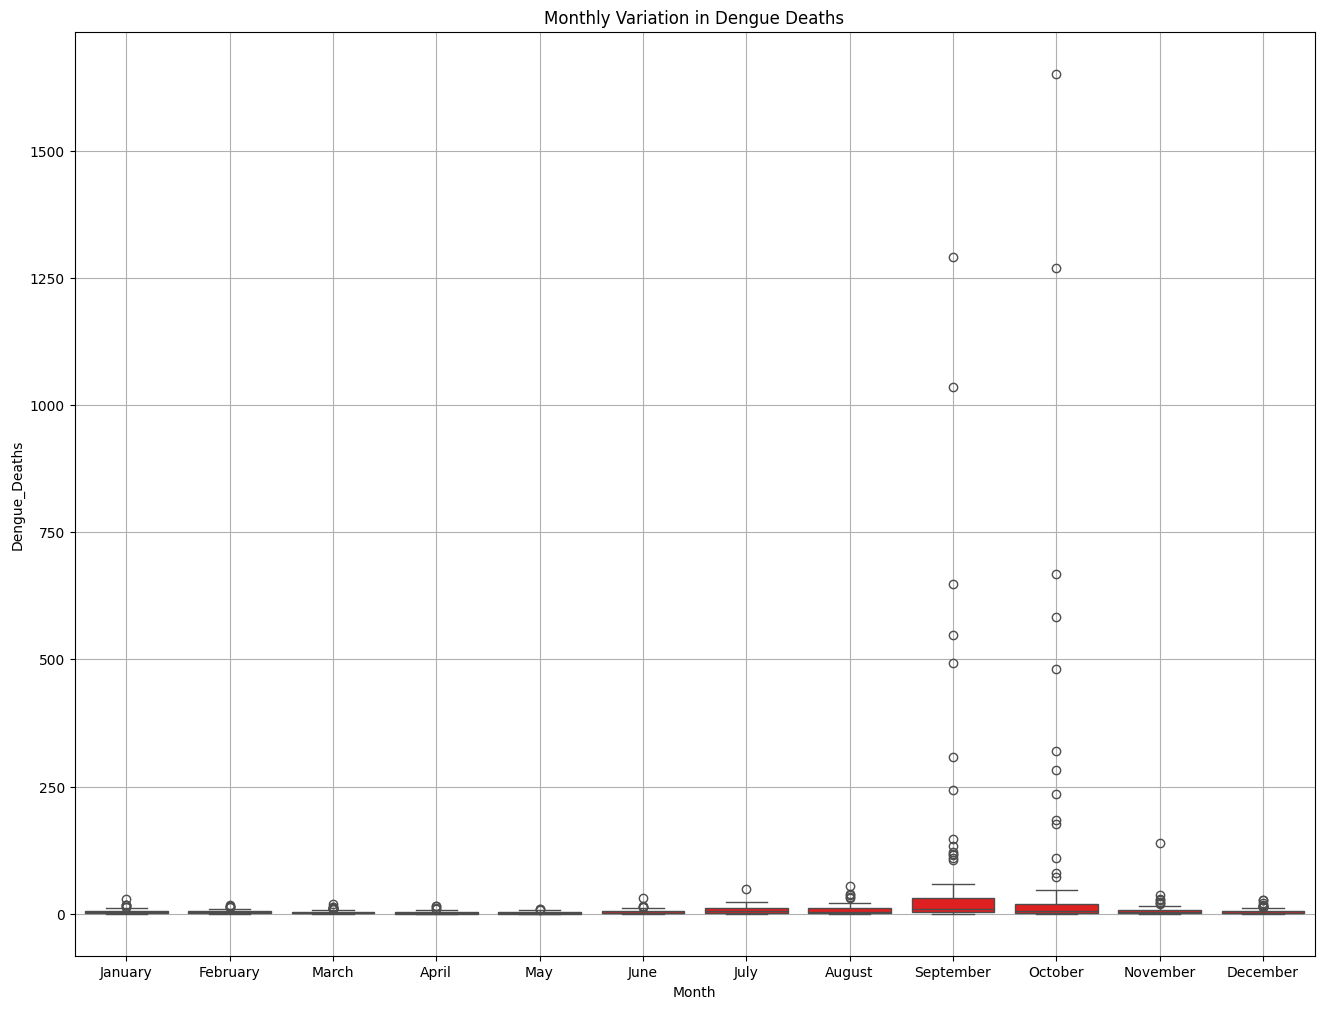

In [8]:
plt.figure(figsize=(16, 12))
sns.boxplot(x="Month", y="Dengue_Deaths", data=deng, color="red")
plt.title("Monthly Variation in Dengue Deaths")
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 6</h1>
<h3>Yearly Dengue Cases Using Scatterplot</h3>

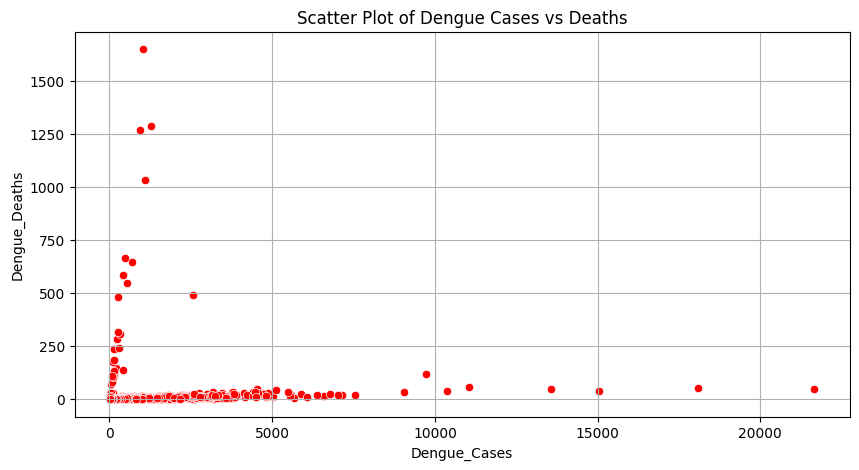

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=deng['Dengue_Cases'], y=deng['Dengue_Deaths'], color='Red')
plt.title('Scatter Plot of Dengue Cases vs Deaths')
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 7</h1>
<h3>Correlation between Dengue Cases and Deaths</h3>

In [10]:
vis7 = deng['Dengue_Cases'].corr(deng['Dengue_Deaths'])
print(vis7)

0.03832213720419492


<h1 style="color:yellow;">Insight 8</h1>
<h3>Dengue Cases From Months</h3>

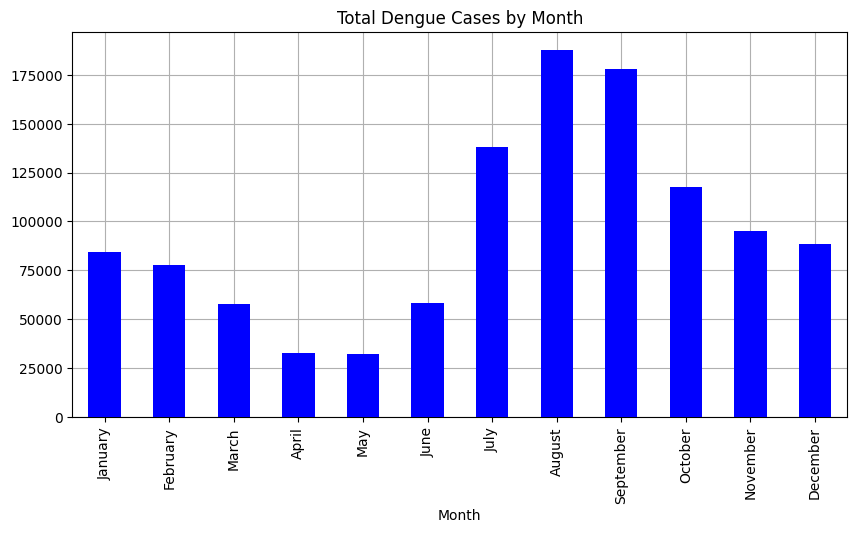

In [11]:
vis8 = deng.groupby('Month')['Dengue_Cases'].sum().reindex(month_order)
plt.figure(figsize=(10, 5))
vis8.plot(kind='bar', color='blue', zorder=3)
plt.title('Total Dengue Cases by Month')
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 9</h1>
<h3>Dengue Cases Using Histogram</h3>

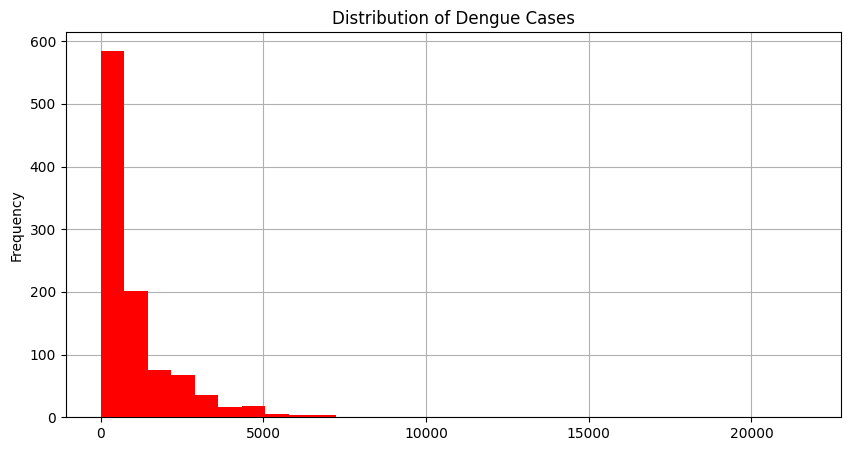

In [12]:
plt.figure(figsize=(10, 5))
deng['Dengue_Cases'].plot(kind='hist', bins=30, color='red', zorder=3)
plt.title("Distribution of Dengue Cases")
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 10</h1>
<h3>Cases per Year Trend</h3>

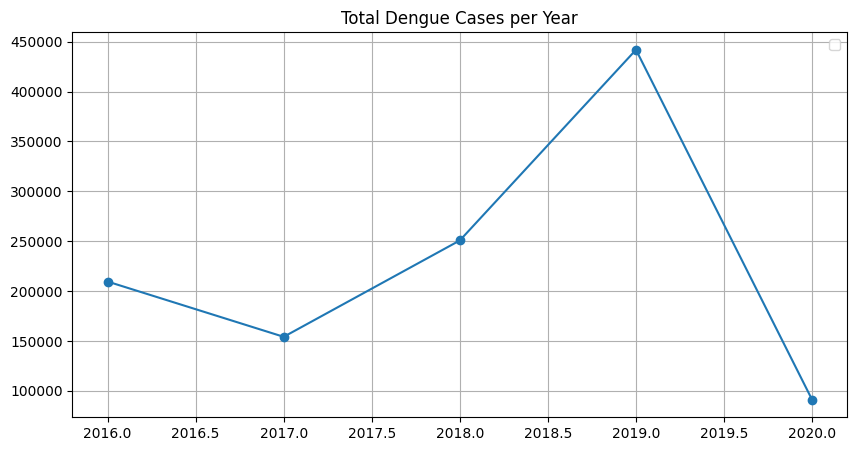

In [13]:
vis10 = deng.groupby(['Year'])['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(vis10['Year'], vis10['Dengue_Cases'], marker='o', zorder=3)
plt.grid(True, zorder=0)
plt.title('Total Dengue Cases per Year')
plt.legend()

<h1 style="color:yellow;">Insight 11</h1>
<h3>Dengue Cases in Regions</h3>

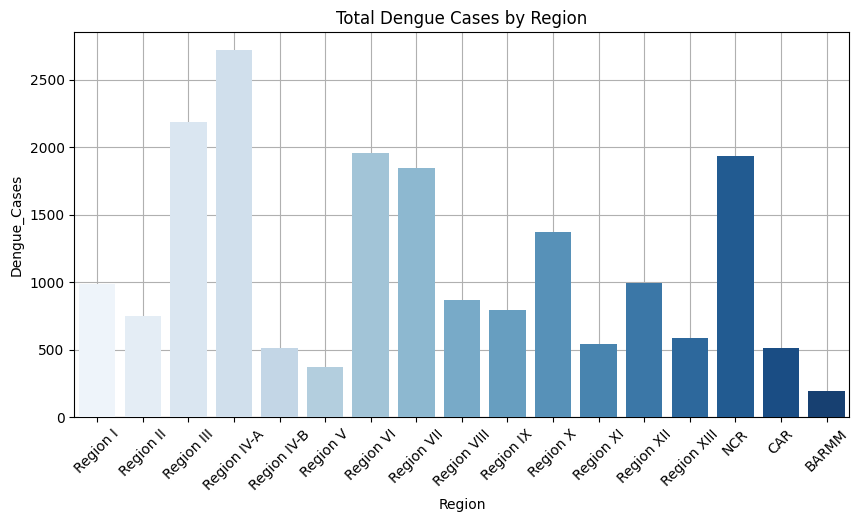

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Dengue_Cases', data=deng, palette='Blues', ci=None, zorder=3)
plt.title('Total Dengue Cases by Region')
plt.grid(True, zorder=0)
plt.xticks(rotation=45)
plt.show()

<h1 style="color:yellow;">Insight 12</h1>
<h3>Dengue Deaths in Region</h3>

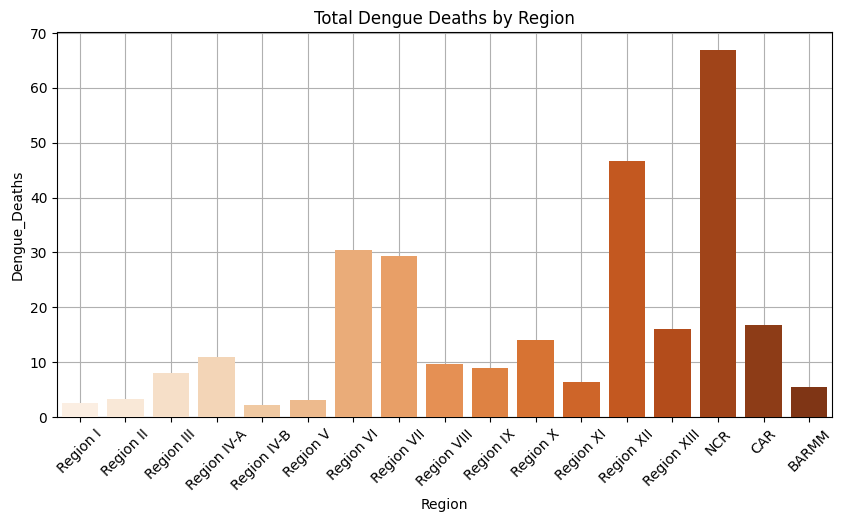

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Dengue_Deaths', data=deng, palette='Oranges', ci=None, zorder=3)
plt.title('Total Dengue Deaths by Region')
plt.grid(True, zorder=0)
plt.xticks(rotation=45)
plt.show()

<h1 style="color:yellow;">Insight 13</h1>
<h3>Dengue Cases in Line Plot</h3>

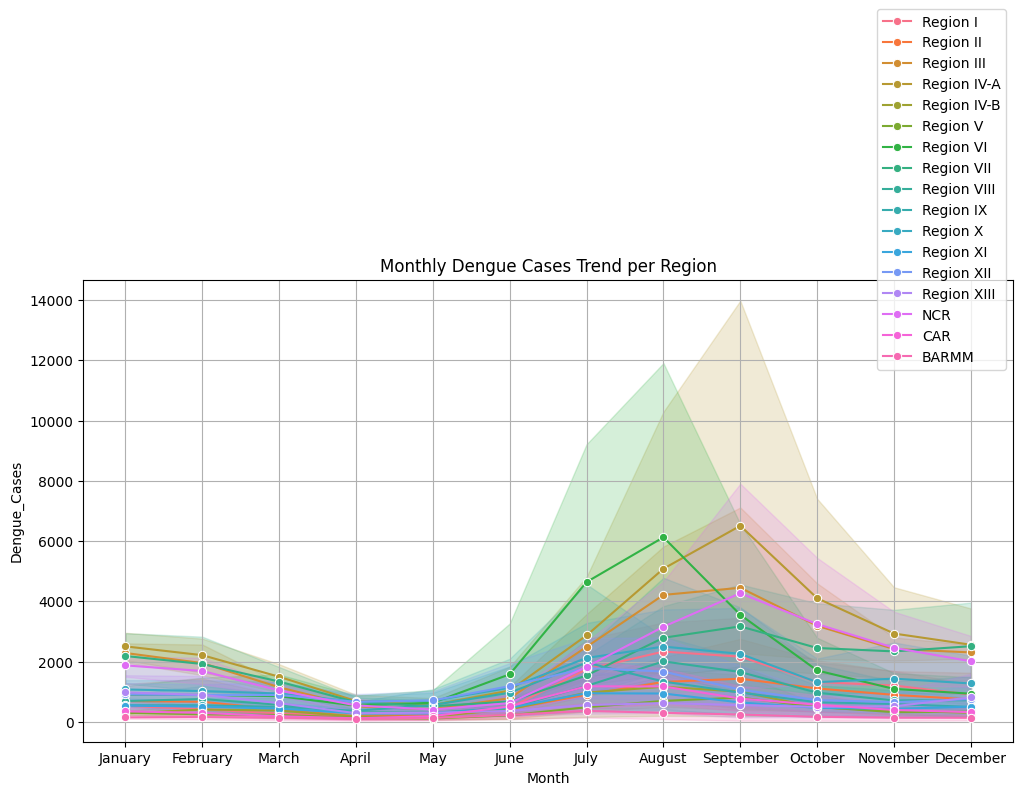

In [16]:
vis13 = deng.groupby(['Region', 'Month'])['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Region', data=deng, marker="o")
plt.title('Monthly Dengue Cases Trend per Region')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1,1.6))
plt.show()

<h1 style="color:yellow;">Insight 14</h1>
<h3>Dengue Cases in Different Region Using Heatmap</h3>

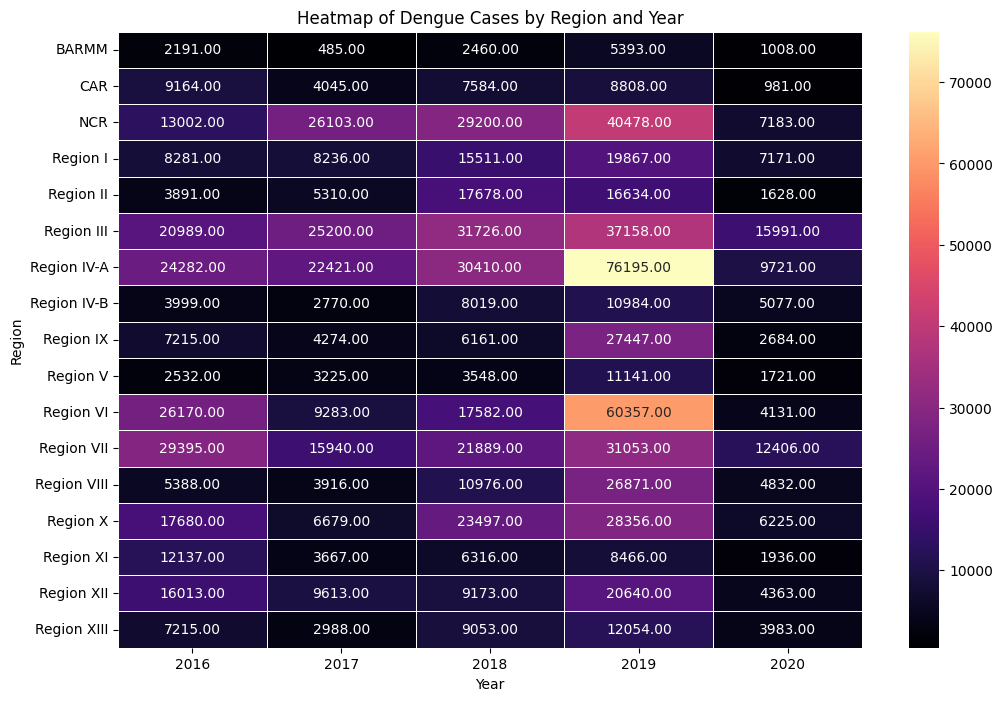

In [17]:
vis14 = deng.pivot_table(values='Dengue_Cases', index='Region', columns='Year', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(vis14, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Dengue Cases by Region and Year')
plt.show()

<h1 style="color:yellow;">Insight 15</h1>
<h3>Deaths Distribution by Region Using Boxplot</h3>

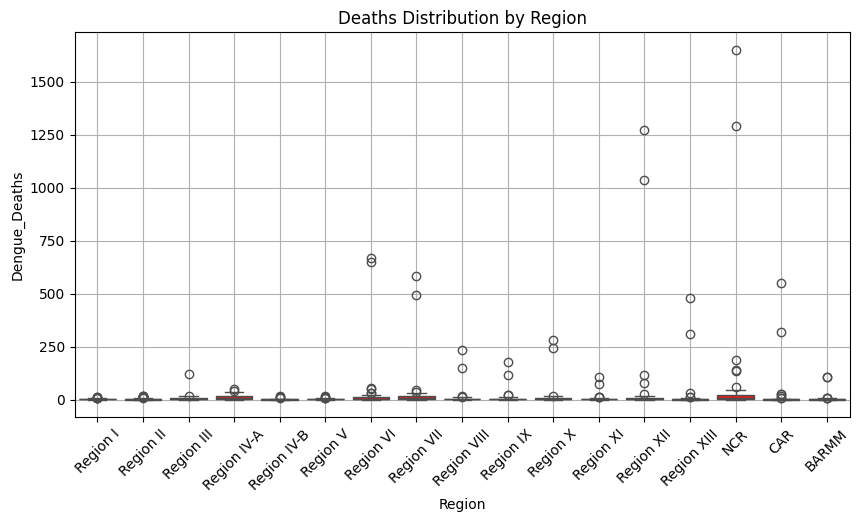

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Dengue_Deaths', data=deng, color='red')
plt.title('Deaths Distribution by Region')
plt.grid(True, zorder=0)
plt.xticks(rotation=45)
plt.show()

<h1 style="color:yellow;">Insight 16</h1>
<h3>Dengue Deaths in Different Region Using Heatmap (Again and Again)</h3>

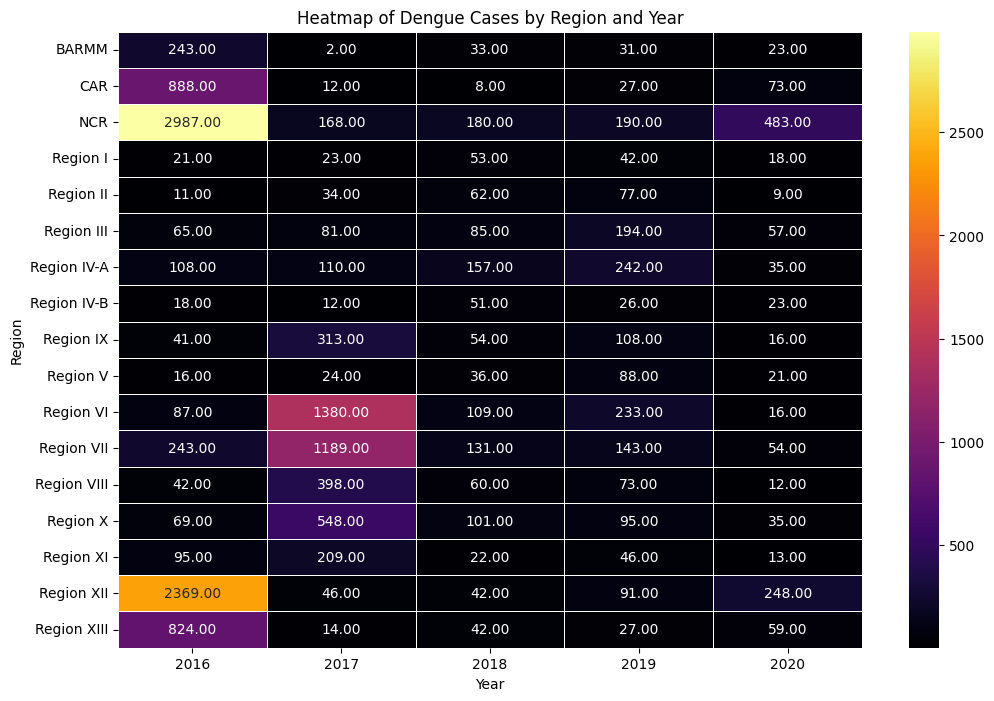

In [19]:
vis16 = deng.pivot_table(values='Dengue_Deaths', index='Region', columns='Year', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(vis16, cmap="inferno", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Dengue Cases by Region and Year')
plt.show()

<h1 style="color:yellow;">Insight 17</h1>
<h3>Dengue Cases in Region Using Scatterplot</h3>

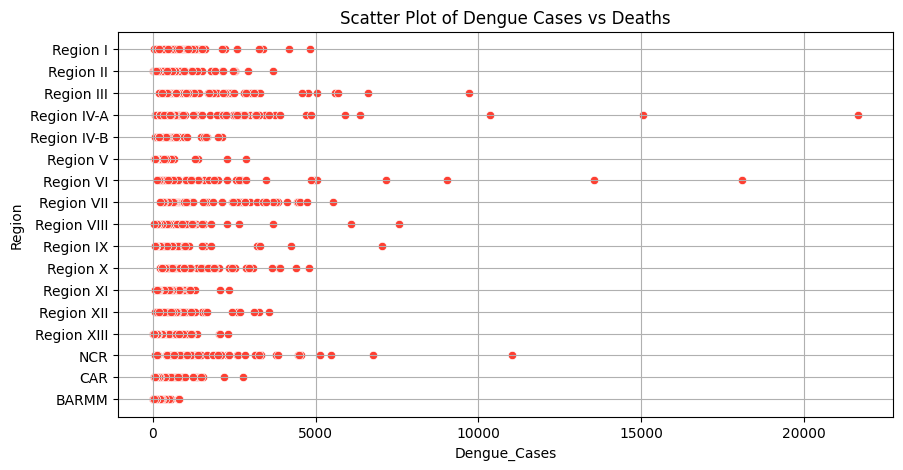

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=deng['Dengue_Cases'], y=deng['Region'], color='#fe3e31')
plt.title('Scatter Plot of Dengue Cases vs Deaths')
plt.grid(True, zorder=0)
plt.show()

<h1 style="color:yellow;">Insight 18</h1>
<h3></h3>

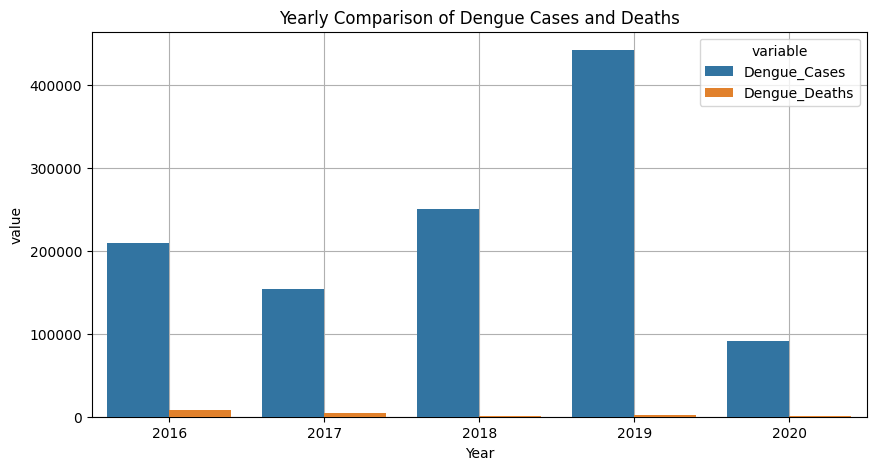

In [21]:
vis18 = deng.groupby(['Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
comparison = pd.melt(vis18, id_vars=['Year'], value_vars=['Dengue_Cases', 'Dengue_Deaths'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='value', hue='variable', data=comparison, zorder=3)
plt.title('Yearly Comparison of Dengue Cases and Deaths')
plt.grid(True)
plt.show()

<h1 style="color:yellow;">Insight 19</h1>
<h3></h3>

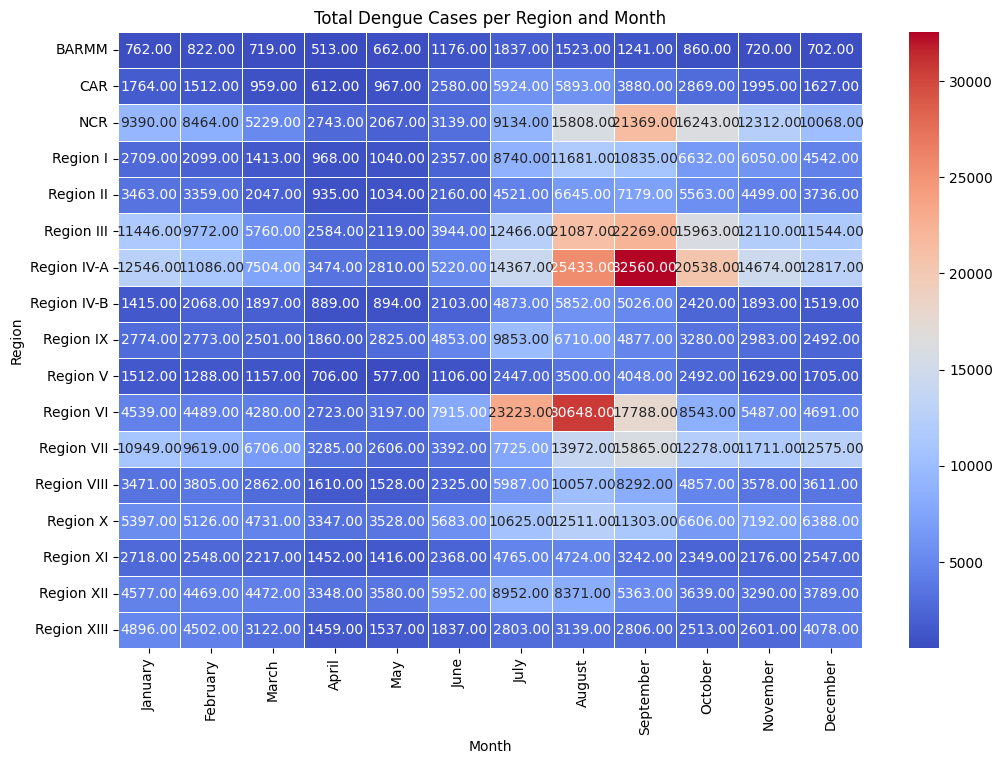

In [22]:
vis19 = deng.pivot_table(values='Dengue_Cases', index='Region', columns='Month', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(vis19, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Total Dengue Cases per Region and Month')
plt.show()

<h1 style="color:yellow;">Insight 20</h1>
<h3>Percentage of the total cases in different regions</h3>

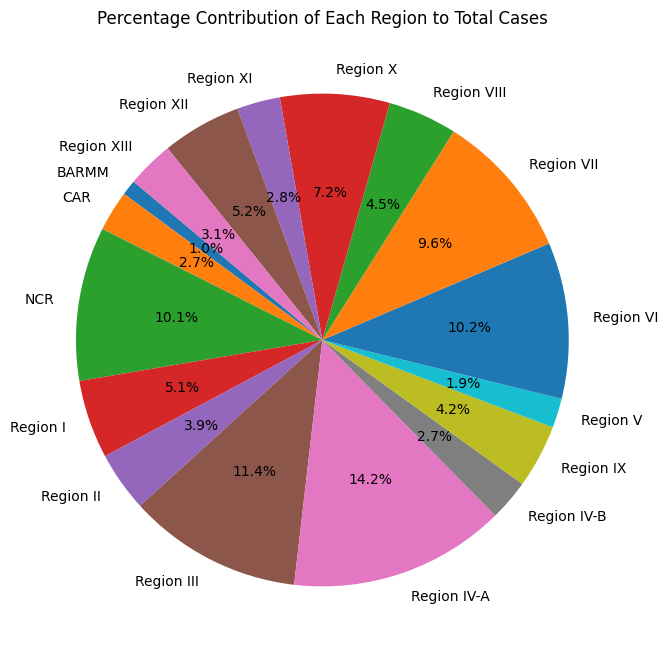

In [33]:
vis20 = deng.groupby(['Region'])['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(vis20['Dengue_Cases'], labels=vis20['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each Region to Total Cases')
plt.show()